In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd
import numpy as np
import seaborn as sns
gases = ['D_NO', 'D_NO2', 'D_PM10', 'N_NO', 'N_NO2', 'N_Ox', 'N_O3', 'N_PM10',
         'O_NO', 'O_NO2', 'O_PM10', 'S_NO', 'S_NO2', 'S_Ox', 'S_O3', 'S_PM10',
          'W_NO', 'W_NO2', 'W_PM10']

In [2]:
graz_all = pd.read_csv('../data/graz_all_p3.csv', index_col=0)
graz_all.index = pd.DatetimeIndex(graz_all.index)
dymo = graz_all.index.to_series().apply(lambda x: x.strftime('%m-%d'))

,Concentration,Pollutant,Type
0,80.518212,S_Ox,MEAN
1,78.118577,S_Ox,MEAN
2,68.669162,S_Ox,MEAN
3,74.327676,S_Ox,MEAN
4,81.498823,S_Ox,MEAN
5,81.355594,S_Ox,MEAN
6,87.658728,S_Ox,MEAN
7,75.000000,S_Ox,MEAN-HLD-TRUE
8,76.000000,S_Ox,MEAN-HLD-PRED


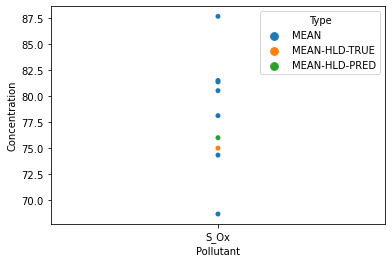

In [3]:
# means = {
#     'historical' : graz_all[j][(dymo > '03-20')&(dymo < '04-14')].groupby([graz_all.year]).median().values,
#     'mean-hld-true': 80,
#     'mean-hld-pred': 70
# }
j = 'N_Ox'
dfff = pd.DataFrame({
    'Concentration': graz_all[j][(dymo > '03-20')&(dymo < '04-14')].groupby([graz_all.year]).median().values, 
    'Pollutant': 'S_Ox', 
    'Type': 'MEAN'})

predicted_df = pd.DataFrame({
    'Concentration': [75,76], 
    'Pollutant': 'S_Ox', 
    'Type': ['MEAN-HLD-TRUE', 'MEAN-HLD-PRED']})

dfff = dfff.append(predicted_df, ignore_index = True) 

ax = sns.swarmplot(x='Pollutant', y='Concentration', data=dfff, hue='Type', orient='v')

display(dfff)

In [4]:
# samo da stane sve u jedan red
# vidi tablicu ispod, moze i iz nje

In [5]:
histmedian = graz_all[gases][(dymo > '03-20')&(dymo < '04-14')].groupby([graz_all.year]).median()
histmedian.round(1)

,D_NO,D_NO2,D_PM10,N_NO,N_NO2,N_Ox,N_O3,N_PM10,O_NO,O_NO2,O_PM10,S_NO,S_NO2,S_Ox,S_O3,S_PM10,W_NO,W_NO2,W_PM10
year,,,,,,,,,,,,,,,,,,,
2014,38.7,50.8,32.7,1.7,23.2,80.5,56.0,23.0,14.6,31.2,32.1,11.7,34.7,81.0,44.9,32.8,9.5,30.8,28.8
2015,28.0,36.6,22.3,1.4,17.7,78.1,62.8,19.4,6.7,21.8,20.0,8.6,27.0,85.4,51.8,23.1,3.1,24.3,16.8
2016,39.6,40.6,27.8,2.7,17.6,68.7,52.7,19.8,13.5,26.0,23.9,10.0,26.3,74.8,48.6,22.4,4.1,21.3,19.9
2017,42.6,46.6,28.9,4.5,21.1,74.3,48.8,23.4,16.4,29.3,30.5,16.2,31.6,79.0,46.0,29.9,7.9,28.8,29.1
2018,29.7,43.8,25.3,3.2,22.2,81.5,60.4,25.5,8.0,31.4,29.6,9.7,25.8,79.2,53.9,24.7,3.8,25.2,23.5
2019,29.0,48.7,24.4,1.6,19.8,81.4,60.7,19.7,7.9,26.0,28.3,12.2,34.6,82.7,48.5,25.7,4.1,29.3,22.9
2020,15.1,28.5,21.1,0.9,12.7,87.7,76.3,21.8,2.9,11.6,23.4,7.7,19.0,82.0,63.7,23.0,2.3,20.3,22.4


In [6]:
best_models = pd.read_csv('../results/all_results.csv', index_col=0)
best_models.index = pd.DatetimeIndex(best_models.index)
display(best_models.columns)

# D_NO = N_NO = W_NO = S_NO = O_NO = best_models['no_PRED'][(best_models.index > '2020-03-20')&(best_models.index < '2020-04-14')].median()
# D_NO2 = N_NO2 = W_NO2 = S_NO2 = O_NO2 = best_models['no2_PRED'][(best_models.index > '2020-03-20')&(best_models.index < '2020-04-14')].median()
# D_PM10 = N_PM10 = W_PM10 = S_PM10 = O_PM10 = best_models['pm10_PRED'][(best_models.index > '2020-03-20')&(best_models.index < '2020-04-14')].median()
# N_O3 = S_O3 = best_models['o3_PRED'][(best_models.index > '2020-03-20')&(best_models.index < '2020-04-14')].median()
# N_Ox = S_Ox = np.nan

Index(['D_NO_PRED', 'D_NO_TRUE', 'D_NO2_PRED', 'D_NO2_TRUE', 'D_PM10_PRED',
       'D_PM10_TRUE', 'N_NO_PRED', 'N_NO_TRUE', 'N_NO2_PRED', 'N_NO2_TRUE',
       'N_Ox_PRED', 'N_Ox_TRUE', 'N_O3_PRED', 'N_O3_TRUE', 'N_PM10_PRED',
       'N_PM10_TRUE', 'O_NO_PRED', 'O_NO_TRUE', 'O_NO2_PRED', 'O_NO2_TRUE',
       'O_PM10_PRED', 'O_PM10_TRUE', 'S_NO_PRED', 'S_NO_TRUE', 'S_NO2_PRED',
       'S_NO2_TRUE', 'S_Ox_PRED', 'S_Ox_TRUE', 'S_O3_PRED', 'S_O3_TRUE',
       'S_PM10_PRED', 'S_PM10_TRUE', 'W_NO_PRED', 'W_NO_TRUE', 'W_NO2_PRED',
       'W_NO2_TRUE', 'W_PM10_PRED', 'W_PM10_TRUE'],
      dtype='object')

C:\Users\mlovric\Anaconda3\envs\envphd\lib\site-packages\seaborn\axisgrid.py:861: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self.fig.tight_layout()


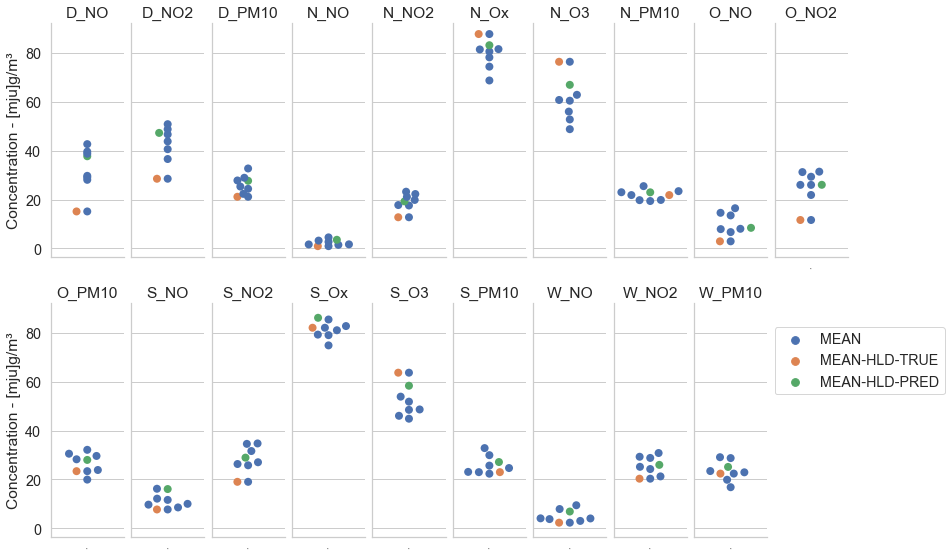

In [7]:
swarmplot_data = pd.DataFrame({'Concentration': [],'Pollutant': [], 'Type': []})
for gas in gases:

    swarmplot_data = swarmplot_data.append(pd.DataFrame({
        'Concentration': graz_all[gas][(dymo > '03-20')&(dymo < '04-14')].groupby([graz_all.year]).median().values, 
        'Pollutant': gas, 
        'Type': 'MEAN'}), ignore_index=True)

    swarmplot_data = swarmplot_data.append(pd.DataFrame({
                    'Concentration': graz_all[gas][(graz_all.index > '2020-03-20')&(graz_all.index < '2020-04-14')].groupby([graz_all.year]).median().values, 
                    'Pollutant': gas, 
                    'Type': 'MEAN-HLD-TRUE'}), ignore_index=True)

    swarmplot_data = swarmplot_data.append(pd.DataFrame({
        'Concentration': [best_models['{}_PRED'.format(gas)][(best_models.index > '2020-03-20')&(best_models.index < '2020-04-14')].median()], 
        'Pollutant': gas, 
        'Type': 'MEAN-HLD-PRED'}), ignore_index=True)

swarmplot_data['Category'] = 'Category'

# sns.set_style("whitegrid"),
sns.set(style='whitegrid', font_scale=1.3)
# markers = {"MEAN": "s", "MEAN-HLD-PRED": "X", "MEAN-HLD-TRUE": '<'}

g = sns.catplot(x='Category', y='Concentration', hue='Type', col="Pollutant", 
            data=swarmplot_data, kind="swarm", height=4, aspect=.3, col_wrap=10, legend=False, s=8, dodge=False);

g.set(xlabel = '')
g.set_xticklabels(ax.get_xticklabels(), fontsize=0)
# g.set_yticklabels(ax.get_yticklabels(), fontsize=12)
# plt.tight_layout()
g.set_titles("{col_name}")
g.set_ylabels("Concentration - [mju]g/m³")
  

plt.legend(bbox_to_anchor=(1.1, .9), loc=2, borderaxespad=0.) #, fontsize=12
plt.subplots_adjust(hspace = 0.2, wspace = 0.1)

#g.savefig('../results/201x-mean-swarmplot.tiff')


